<a href="https://colab.research.google.com/github/JumanaSrour/Basic-Data-Analysis-and-Model-Building-Using-Python/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pima_df = pd.read_csv("diabetes.csv")

In [5]:
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
pima_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
pima_df.rename(columns = {'Pregnancies':'Preg', 'BloodPressure':'BP', 'SkinThickness':'Skin',
                          'DiabetesPedigreeFunction':'DPF','Outcome':'Class'
                          }, inplace = True)
pima_df.head()

,Preg,Glucose,BP,Skin,Insulin,BMI,DPF,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
pima_df.shape

(768, 9)

In [10]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Preg     768 non-null    int64  
 1   Glucose  768 non-null    int64  
 2   BP       768 non-null    int64  
 3   Skin     768 non-null    int64  
 4   Insulin  768 non-null    int64  
 5   BMI      768 non-null    float64
 6   DPF      768 non-null    float64
 7   Age      768 non-null    int64  
 8   Class    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
#Analysing a single columns
bmi_df = pima_df['BMI']
bmi_df.describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


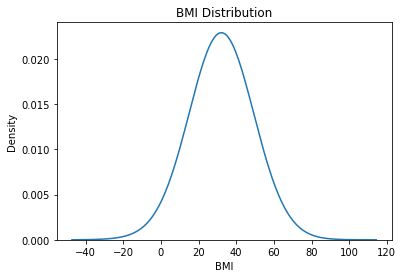

In [12]:
sns.kdeplot(bmi_df, bw=2)
plt.xlabel("BMI")
plt.ylabel("Density")
plt.title("BMI Distribution")
plt.show()

In [13]:
pima_df["Class"].value_counts()

0    500
1    268
Name: Class, dtype: int64

# **Data Preproccessing**

In [14]:
#library for resampling
from sklearn.utils import resample

In [15]:
df_majority = pima_df[pima_df.Class == 0]
df_minority = pima_df[pima_df.Class == 1]

In [16]:
# Upsampling
df_minority_upsampled = resample(df_minority, replace = True, n_samples = 500, random_state = 123)

#combine majority abd upsampled minority classes
pima_df_upsampled = pd.concat([df_majority, df_minority_upsampled])

#display new class counts
pima_df_upsampled.Class.value_counts()

1    500
0    500
Name: Class, dtype: int64

In [17]:
# downsampling the mojority class
df_majority_downsampled = resample(df_majority, replace = True, n_samples = 268, random_state = 123)

#combine minority abd downsampled majority class
pima_df_downsampled = pd.concat([df_minority, df_majority_downsampled])

#display new class counts
pima_df_downsampled.Class.value_counts()

1    268
0    268
Name: Class, dtype: int64

# **Data Preperation and PCA Intro**

In [18]:
# Function to plot class distribution
def visualize_classes(df_name):
  labels, counts = np.unique(df_name['Class'], return_counts = True)
  colors = ['r', 'b']
  plt.figure(figsize = (8, 8))
  plt.bar(labels, counts, color = colors)
  plt.gca().set_xticks(labels)
  plt.xlabel('Class', fontsize = 15)
  plt.ylabel('Count', fontsize = 15)
  plt.title('Class distribution')
  plt.show()


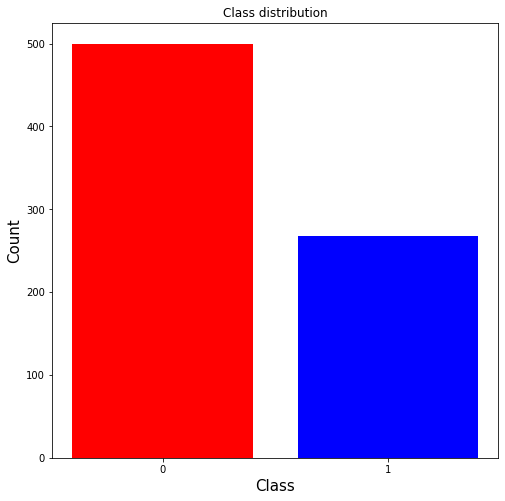

In [19]:
visualize_classes(pima_df)

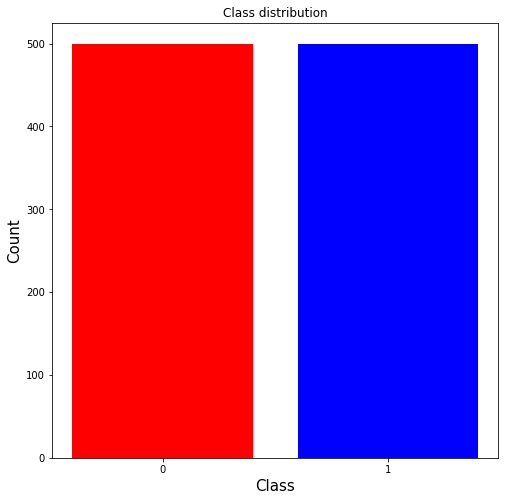

In [20]:
visualize_classes(pima_df_upsampled)

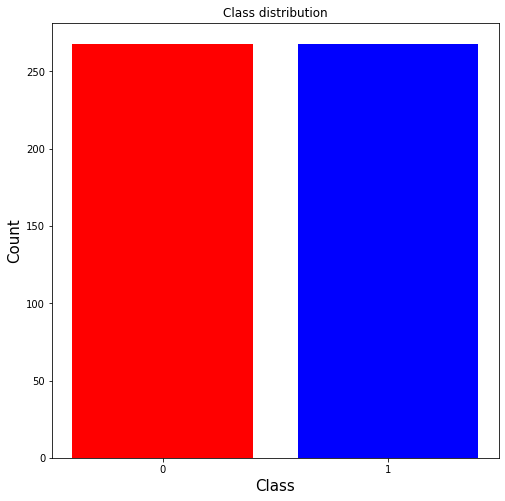

In [21]:
visualize_classes(pima_df_downsampled)

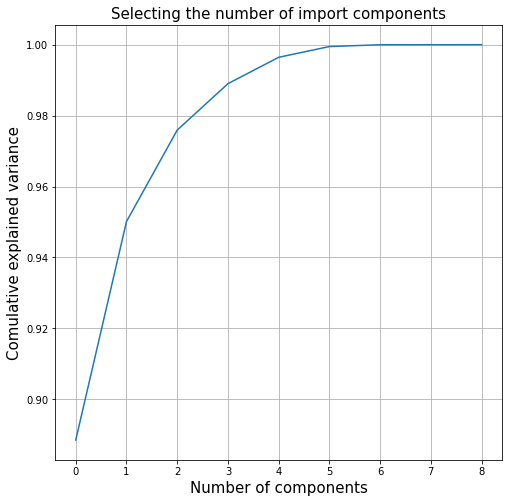

In [22]:
from sklearn.decomposition import PCA
pca = PCA().fit(pima_df)
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components', fontsize=15)
plt.ylabel('Comulative explained variance', fontsize=15)
plt.title('Selecting the number of import components', fontsize=15)
plt.grid()
plt.show()

In [23]:
features = pima_df_upsampled.drop('Class', 1)
labels = pima_df_upsampled['Class']

In [24]:
features.describe()

,Preg,Glucose,BP,Skin,Insulin,BMI,DPF,Age
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.125000,125.106000,69.28000,21.350000,86.185000,32.586200,0.487257,33.814000
std,3.494794,32.606195,19.32483,16.350683,119.805209,7.641129,0.332818,11.390133
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,102.000000,64.00000,0.000000,0.000000,27.800000,0.248000,25.000000
50%,3.000000,122.000000,72.00000,24.000000,44.000000,32.800000,0.395000,30.000000
75%,6.000000,146.250000,80.00000,33.000000,135.000000,36.800000,0.654250,41.250000
max,17.000000,199.000000,122.00000,99.000000,846.000000,67.100000,2.329000,81.000000


In [25]:
labels.describe()

count    1000.00000
mean        0.50000
std         0.50025
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: Class, dtype: float64

# **Data Scaling**

In [26]:
#Split Data
from sklearn.model_selection import train_test_split


In [27]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, Binarizer

In [29]:
#Standard Scaler
scale_features_std = StandardScaler()
features_train_std = scale_features_std.fit_transform(features_train)
features_test_std = scale_features_std.fit_transform(features_test)

#Verify standardization
print(features_train_std)

[[-0.86722921 -0.41684056  0.12683892 ...  0.22688118  0.11740371
  -0.75968864]
 [ 1.13055638  1.61637999  0.12683892 ...  0.01214322  0.6943731
   0.18591053]
 [-1.15262716 -0.99342549 -0.48231279 ... -0.49312257  0.12948683
  -1.01757932]
 ...
 [-1.15262716  1.88949917  0.63446534 ... -0.07627829  0.58260416
  -1.01757932]
 [ 1.70135227 -0.75065289  0.83751591 ...  1.64162539  1.95403927
   0.35783765]
 [-0.58183127  2.16261835  0.02531364 ... -0.26575296 -1.0002857
   1.64729106]]


In [30]:
#Robust Scaler
scale_features_rs = RobustScaler()
features_train_rs = scale_features_rs.fit_transform(features_train)
features_test_rs = scale_features_rs.fit_transform(features_test)

#Verify standardization
print(features_train_rs)

[[-0.4        -0.21857923  0.         ...  0.16533333  0.30619684
  -0.29411765]
 [ 1.          1.24590164  0.         ... -0.016       0.77035237
   0.35294118]
 [-0.6        -0.63387978 -0.75       ... -0.44266667  0.31591738
  -0.47058824]
 ...
 [-0.6         1.44262295  0.625      ... -0.09066667  0.68043742
  -0.47058824]
 [ 1.4        -0.45901639  0.875      ...  1.36        1.7837181
   0.47058824]
 [-0.2         1.63934426 -0.125      ... -0.25066667 -0.59295261
   1.35294118]]


# **Model Building**

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [32]:
logistic_regression = LogisticRegression(solver = 'lbfgs', max_iter=200)
logistic_regression.fit(features_train, labels_train)
preds = logistic_regression.predict(features_test)
print("Model Accuracy: ", accuracy_score(labels_test, preds))

Model Accuracy:  0.756


In [33]:
from pickle import dump, load
model = LogisticRegression(max_iter=200)
model.fit(features_train, labels_train)
filename = 'pima_indians_model.sav'
dump(model, open(filename, 'wb'))

In [34]:
saved_model = load(open(filename, 'rb'))

# **Versioning**

In [35]:
import matplotlib
import sklearn

In [36]:
print("NumPy Version: ", np.__version__)
print("Pandas Version: ", pd.__version__)
print("Matplotlib Version: ", matplotlib.__version__)
print("Sklearn Version: ", sklearn.__version__)
print("Seaborn Version: ", sns.__version__)

NumPy Version:  1.19.5
Pandas Version:  1.1.5
Matplotlib Version:  3.2.2
Sklearn Version:  0.22.2.post1
Seaborn Version:  0.11.1


In [37]:
from platform import python_version
print("Python version: ", python_version())

Python version:  3.7.10
